In [1]:


import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

df = pd.read_csv("C:\\Users\\suman\\Desktop\\Assignment\\DS Assignment\\Fraud_check.csv")

In [2]:


df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [3]:


df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [4]:


df = pd.get_dummies(df,columns = ["TaxInc"],drop_first=True)

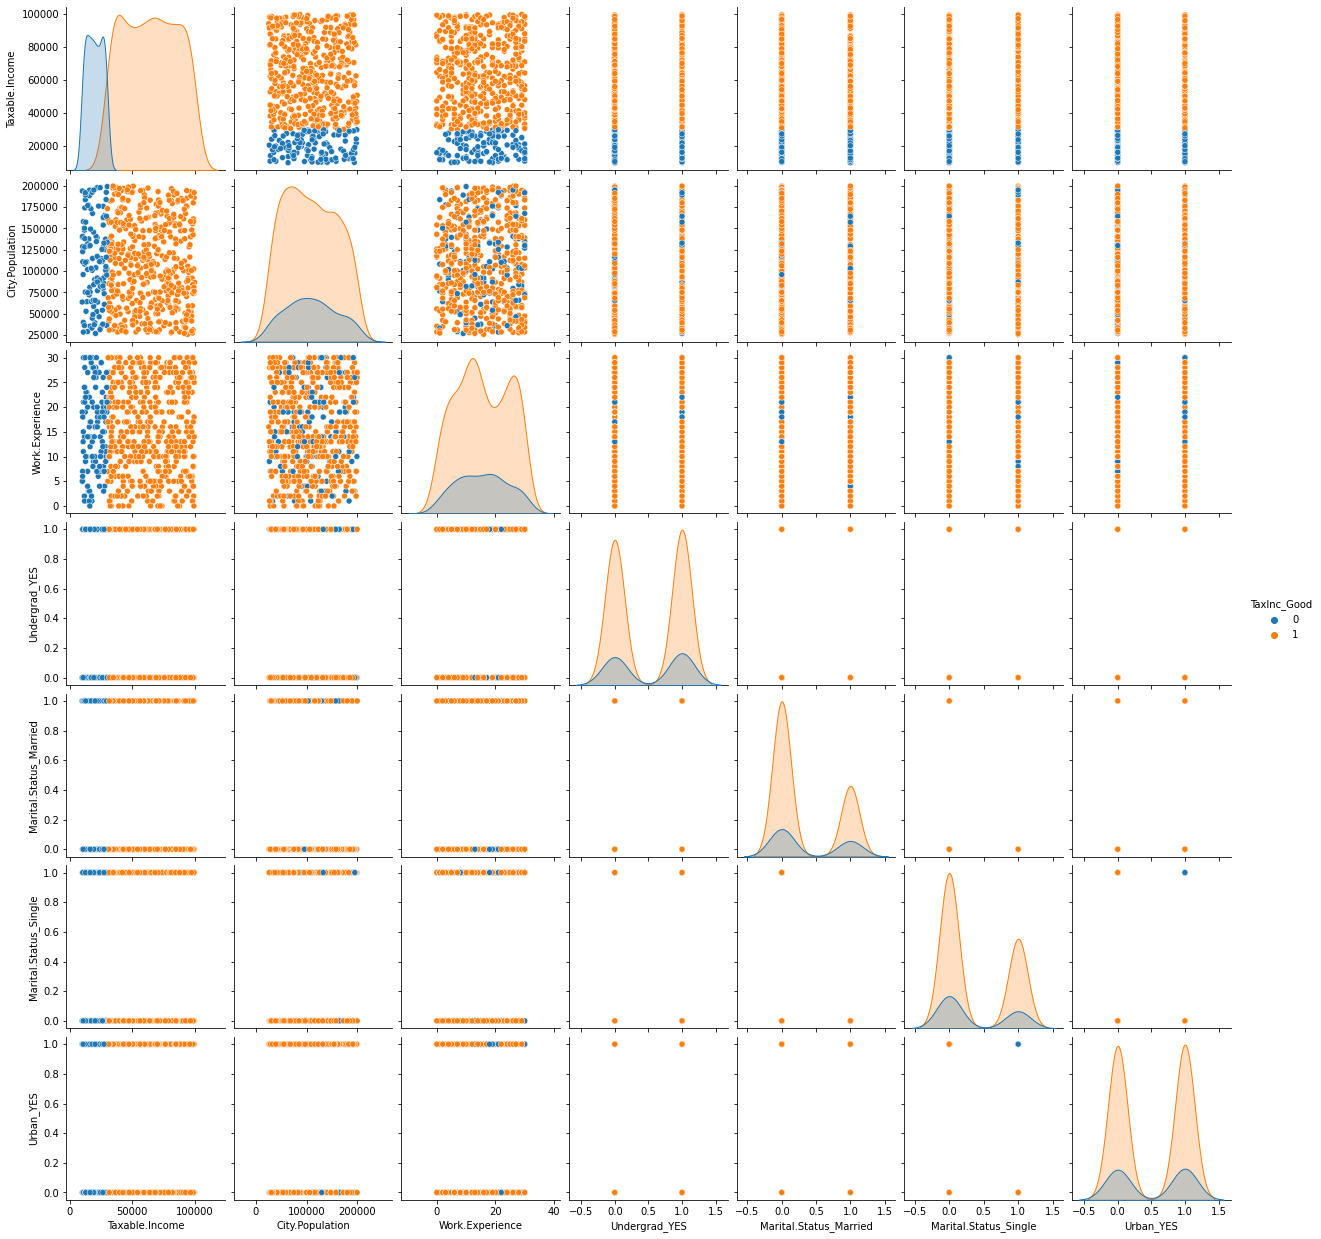

In [5]:


import seaborn as sns
sns.pairplot(data=df, hue = 'TaxInc_Good')

In [6]:


def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [7]:


df_norm = norm_func(df.iloc[:,1:])
df_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [8]:


X = df_norm.drop(['TaxInc_Good'], axis=1)
y = df_norm['TaxInc_Good']

In [9]:


from sklearn.model_selection import train_test_split

In [10]:


Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:


df_norm["income"]="<=30000"
df_norm.loc[df["Taxable.Income"]>=30000,"income"]="Good"
df_norm.loc[df["Taxable.Income"]<=30000,"income"]="Risky"

In [12]:


df.drop(["Taxable.Income"],axis=1,inplace=True)

In [13]:


df.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)

In [14]:


from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = le.fit_transform(df[column_name])
    else:
        pass

In [15]:


features = df.iloc[:,0:5]
labels = df.iloc[:,5]

In [16]:


colnames = list(df.columns)
predictors = colnames[0:5]
target = colnames[5]

In [17]:


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

In [18]:


from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [19]:


model.estimators_
model.classes_
model.n_features_
model.n_classes_

C:\Users\suman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


2

In [20]:


model.n_outputs_

1

In [21]:


model.oob_score_

0.49166666666666664

In [22]:


prediction = model.predict(x_train)

In [23]:


from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)

In [24]:


np.mean(prediction == y_train)*100

99.375

In [25]:


from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)

In [26]:


pred_test = model.predict(x_test)

In [27]:


acc_test =accuracy_score(y_test,pred_test)

In [28]:


from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO

In [29]:


tree = model.estimators_[5]

In [30]:


dot_data = StringIO()
export_graphviz(tree,out_file = dot_data, filled = True,rounded = True, feature_names = predictors ,class_names = target,impurity =False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [31]:


model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [32]:


from sklearn import tree

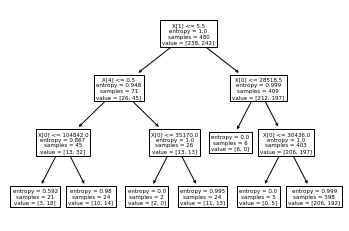

In [33]:


tree.plot_tree(model);

In [34]:


colnames = list(df.columns)
colnames

['population',
 'experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

In [35]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [36]:
model_gini.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=3)

In [38]:
preds=model.predict(x_test)
np.mean(preds==y_test)

0.525

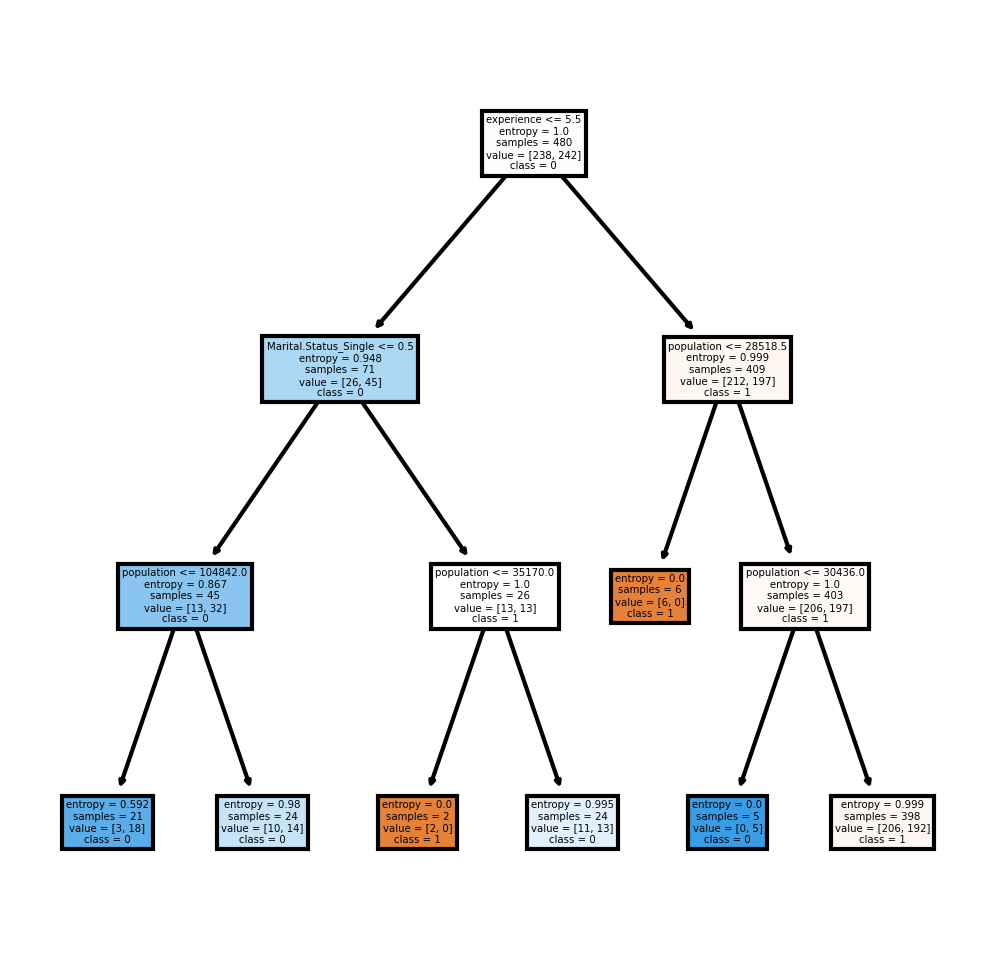

In [39]:


fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [40]:


preds = model.predict(x_test)
pd.Series(preds).value_counts()

0    93
1    27
dtype: int64

In [41]:


pd.crosstab(y_test,preds)

col_0,0,1
Urban_YES,,
0,48,12
1,45,15


In [42]:


np.mean(preds==y_test)

0.525

In [43]:


from sklearn.tree import DecisionTreeRegressor
array = df.values
X = array[:,0:3]
y = array[:,3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

-0.8701026119402988

In [44]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


In [45]:
Kfold =    KFold(n_splits=10)
model3 =   RandomForestClassifier(n_estimators=100,max_features=3)
results=   cross_val_score(model,X,y,cv=Kfold)
print(results.mean())

-1.031676964150623
